### LIBRARIES IMPORT

In [1]:
import pandas as pd
import numpy as np
import datetime

import os
from os.path import join

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.layers import Dense, LSTM, TimeDistributed, Input

import seaborn as sns
import matplotlib.pyplot as plt

### function for RMSLE

In [2]:
def rmsle(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5

### DATA Î∞õÍ∏∞

In [3]:
data_dir = os.getenv('HOME')+'/aiffel/hackathon/data'

# air reservation system
air_reserve = pd.read_csv(data_dir + '/air_reserve.csv')
air_store_info = pd.read_csv(data_dir + '/air_store_info.csv')
air_visit_data = pd.read_csv(data_dir + '/air_visit_data.csv')

# hpg reservation system
hpg_reserve = pd.read_csv(data_dir + '/hpg_reserve.csv')
hpg_store_info = pd.read_csv(data_dir + '/hpg_store_info.csv')

# additional data
store_id_relation = pd.read_csv(data_dir + '/store_id_relation.csv')
date_info = pd.read_csv(data_dir + '/date_info.csv')

# test data
sample_sub = pd.read_csv(data_dir + '/sample_submission.csv')

### DATA ÏÑ§Î™Ö

**`air_reserve.csv`**
- `air_store_id` : AIR Îì±Î°ù Î†àÏä§ÌÜ†ÎûëÏùò Í≥†Ïú† ID
- `visit_datetime` : ÏòàÏïΩÏùÑ ÌÜµÌï¥ Î∞©Î¨∏Ïù¥ ÏôÑÎ£åÎêú ÎÇ†Ïßú
- `reserve_datetime` : ÏòàÏïΩÌïú ÎÇ†ÏßúÏûÖÎãàÎã§.
- `reserve_visitors` : Ìï¥Îãπ ÏòàÏïΩÏùò Î∞©Î¨∏Ïûê Ïàò

**`air_store_info.csv`**
- `air_store_id` : AIR Îì±Î°ù Î†àÏä§ÌÜ†ÎûëÏùò Í≥†Ïú† ID
- `air_genre_name` : ÏãùÎãπ Ï¢ÖÎ•ò
- `air_area_name` : Î†àÏä§ÌÜ†ÎûëÏùò ÏßÄÏó≠Î™Ö
- `latitude` : Î†àÏä§ÌÜ†ÎûëÏùò ÏúÑÎèÑ
- `longitude` : Î†àÏä§ÌÜ†ÎûëÏùò Í≤ΩÎèÑ

**`air_visit_data.csv`**
- `air_store_id` : AIR Îì±Î°ù Î†àÏä§ÌÜ†Îûë Í≥†Ïú† ID
- `visit_date` : ÎÇ†Ïßú
- `visitors` : ÎãπÏùº Î†àÏä§ÌÜ†Îûë Î∞©Î¨∏Í∞ù Ïàò
---

**`hpg_reserve.csv`**
- `hpg_store_id` : HPG Îì±Î°ù Î†àÏä§ÌÜ†ÎûëÏùò Í≥†Ïú† ID
- `hpg_genre_name` : ÏãùÎãπ Ï¢ÖÎ•ò
- `hpg_area_name` : ÏãùÎãπ ÏòÅÏó≠Î™Ö
- `latitude` : Î†àÏä§ÌÜ†ÎûëÏùò ÏúÑÎèÑ
- `longitude` : Î†àÏä§ÌÜ†ÎûëÏùò Í≤ΩÎèÑ

**`hpg_store_info.csv`**
- `hpg_store_id` : HPG Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïùò Î†àÏä§ÌÜ†ÎûëÏóê ÎåÄÌïú Í≥†Ïú† IDÏûÖÎãàÎã§.
- `visit_datetime` : ÏòàÏïΩ ÏãúÍ∞Ñ
- `reserve_datetime` : ÏòàÏïΩÌïú ÏãúÍ∞Ñ
- `reserve_visitors` : Ìï¥Îãπ ÏòàÏïΩÏóê ÎåÄÌïú Î∞©Î¨∏Ïûê Ïàò
---

**`store_id_relation.csv`**
- `id` : idÎäî air_store_id Î∞è visit_dateÎ•º Î∞ëÏ§ÑÍ≥º Ïó∞Í≤∞ÌïòÏó¨ ÌòïÏÑ±Îê©ÎãàÎã§.
- `visitors` : Ïä§ÌÜ†Ïñ¥ Î∞è ÎÇ†Ïßú Ï°∞Ìï©Ïóê ÎåÄÌï¥ ÏòàÏÉÅÎêòÎäî Î∞©Î¨∏Ïûê Ïàò

**`date_info.csv`**
- `calendar_date` : ÎÇ†Ïßú
- `day_of_week` : ÏöîÏùº
- `holiday_flg` : ÎßåÏïΩ Í∑∏ÎÇ†Ïù¥ Ìú¥ÏùºÏù¥ÏóàÎã§Î©¥? 1: Ïòà, 0: ÏïÑÎãàÏöî.
---

**`sample_submission.csv`**
- `hpg_store_id` : HPG Í≥†Ïú† ID
- `air_store_id` : AIR Í≥†Ïú† ID

### DATA Ï§ÄÎπÑ

---

#### TEST DATA - sample_sub

In [4]:
sample_sub.head(3)

id  visitors
0  air_00a91d42b08b08d9_2017-04-23         0
1  air_00a91d42b08b08d9_2017-04-24         0
2  air_00a91d42b08b08d9_2017-04-25         0

In [5]:
# transform test data
air_test = sample_sub.copy()
air_test['air_store_id'] = air_test['id'].apply(lambda x: str(x)[:-11])
air_test['visit_date'] = air_test['id'].apply(lambda x: str(x)[-10:])

# ÏòàÏ∏°ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞
submission_lstm = air_test.copy()

# test set for merger with train set
air_test = air_test.drop(['id', 'visitors'], axis = 1)

In [6]:
air_test.head(3)

air_store_id  visit_date
0  air_00a91d42b08b08d9  2017-04-23
1  air_00a91d42b08b08d9  2017-04-24
2  air_00a91d42b08b08d9  2017-04-25

### visitor

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


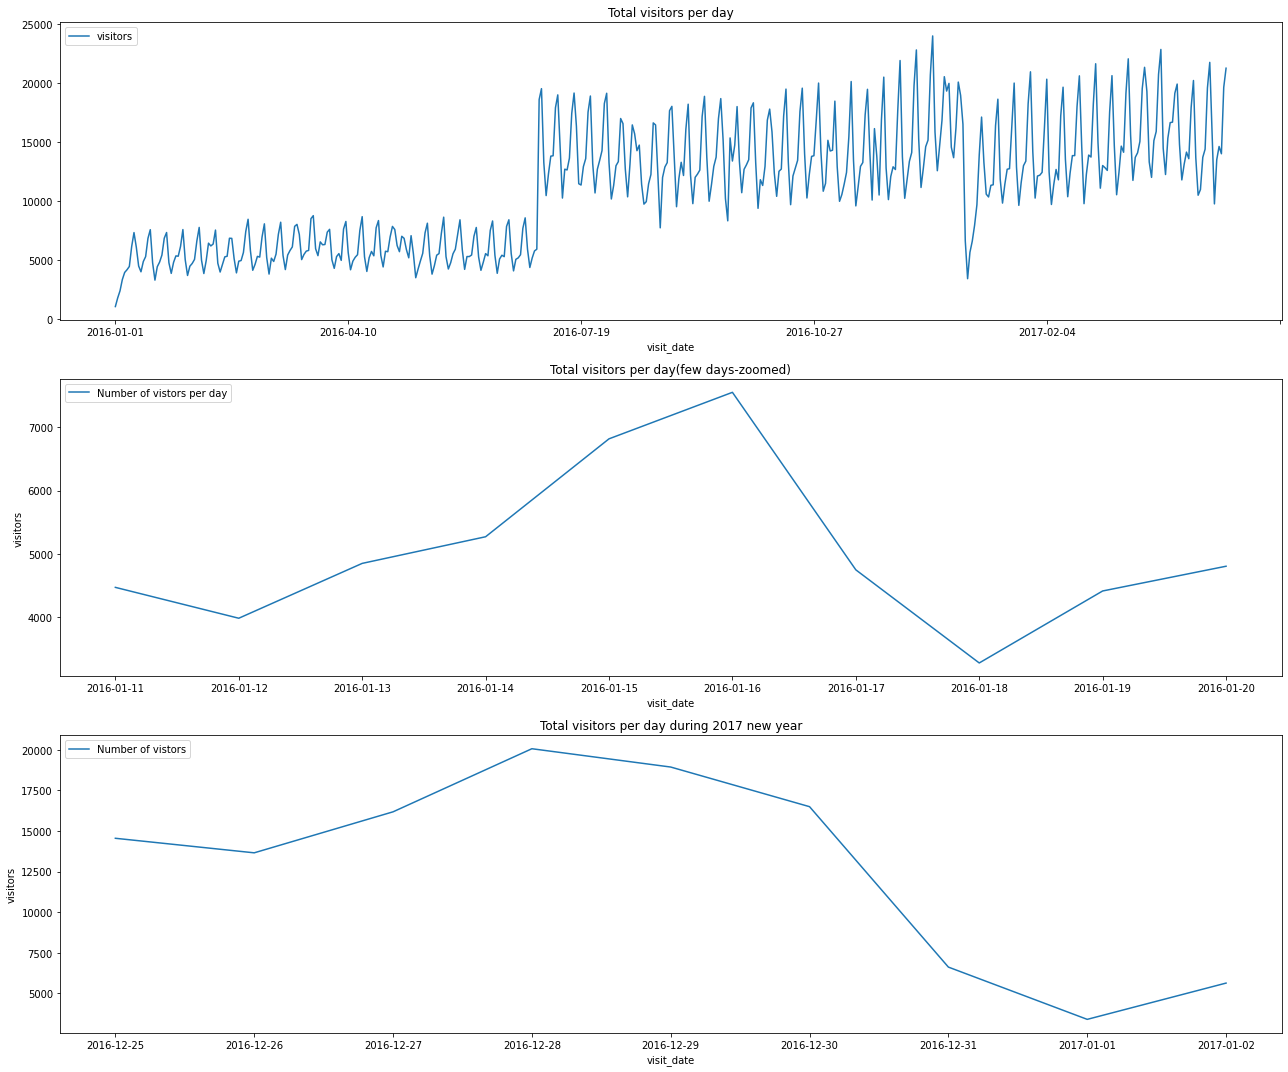

<Figure size 432x288 with 0 Axes>

In [7]:
# per day visitors
fig = plt.figure(figsize=(18,15))

ax1 = fig.add_subplot(311)

temp = air_visit_data.groupby("visit_date").visitors.sum()

temp.plot()
plt.title("Total visitors per day")
plt.legend(loc='upper left')

ax2 = fig.add_subplot(312)
sns.lineplot(temp.index[10:20], temp[10:20], ax=ax2, label="Number of vistors per day")
plt.legend(loc='upper left')
plt.title("Total visitors per day(few days-zoomed)")


temp = temp.loc['2016-12-25': '2017-01-02']

ax3 = fig.add_subplot(313)
sns.lineplot(temp.index, temp, ax=ax3, label="Number of vistors")
plt.title("Total visitors per day during 2017 new year")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig("Visitors_trend_across_the_days.png", bbox_inches='tight')

- 1Î≤à Í∑∏ÎûòÌîÑ : Í≥†Í∞ùÏùò ÏàòÍ∞Ä 7Ïõî Í∏∞Ï†êÏúºÎ°ú Îì±ÎùΩ Ìè≠Ïù¥ ÏûàÎã§. DBÏóê ÏãùÎãπÏù¥ Ï∂îÍ∞ÄÎêòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.
- 3Î≤à Í∑∏ÎûòÌîÑ : 17-01-01 Í∏∞Í∞ÑÏóêÎèÑ Î∞©Î¨∏Í∞ùÏù¥ Í∏âÍ∞êÌïòÍ≥† ÏûàÎäîÎç∞ ÏÉàÌï¥ÎïåÎ¨∏Ïù¥Îã§.

---

#### ÏòàÏïΩ Îç∞Ïù¥ÌÑ∞ -  DATA ON RESERVATION 

In [8]:
# air ÏôÄ hpg databasesÎ•º Ìï©ÏπúÎã§.
hpg_air_reserve = store_id_relation.join(hpg_reserve.set_index('hpg_store_id'), on = 'hpg_store_id')
air_reserve_tmp = air_reserve.copy()
hpg_air_reserve = hpg_air_reserve.drop('hpg_store_id', axis = 1)
reserve = pd.concat([air_reserve_tmp, hpg_air_reserve])

In [9]:
reserve.head(1)

air_store_id       visit_datetime     reserve_datetime  \
0  air_877f79706adbfb06  2016-01-01 19:00:00  2016-01-01 16:00:00   

   reserve_visitors  
0                 1

In [10]:
reserve.visit_datetime[:1]

0    2016-01-01 19:00:00
Name: visit_datetime, dtype: object

In [11]:
# Ï†ÑÌôò!! columns of "reserve" table into datetime ÌòïÏãùÏúºÎ°ú
reserve['visit_datetime'] =  pd.to_datetime(reserve['visit_datetime'])
reserve['reserve_datetime'] =  pd.to_datetime(reserve['reserve_datetime'])

In [12]:
reserve.visit_datetime[:1]

0   2016-01-01 19:00:00
Name: visit_datetime, dtype: datetime64[ns]

In [13]:
# column for visit date inside "reserve" table ÎßåÎì§Ïñ¥ Ï§ÄÎã§.
reserve['visit_date'] = reserve['visit_datetime'].apply(lambda x: str(x)[0:10])

# visit timeÍ≥º reservation time ÏÇ¨Ïù¥Ïùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞ÌïúÎã§.
reserve['hour_gap'] = reserve['visit_datetime'].sub(reserve['reserve_datetime'])
reserve['hour_gap'] = reserve['hour_gap'].apply(lambda x: x/np.timedelta64(1,'h'))
# ÏãúÍ∞ÑÏóêÏÑú ÏãúÍ∞ÑÏùÑ Î∫ÄÍ≤É.

# gapÏùò Ï∞®Ïù¥Ïóê Îî∞Îùº ÏòàÏïΩÏùÑ 5Í∞úÏùò Î≤îÏ£ºÎ°ú Î∂ÑÎ¶¨Ìï¥Ï§ÄÎã§.
reserve['reserve_-12_h'] = np.where(reserve['hour_gap'] <= 12,
                                    reserve['reserve_visitors'], 0)
reserve['reserve_12_37_h'] = np.where((reserve['hour_gap'] <= 37) & (reserve['hour_gap'] > 12),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_37_59_h'] = np.where((reserve['hour_gap'] <= 59) & (reserve['hour_gap'] > 37),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_59_85_h'] = np.where((reserve['hour_gap'] <= 85) & (reserve['hour_gap'] > 59),
                                       reserve['reserve_visitors'], 0)
reserve['reserve_85+_h'] = np.where((reserve['hour_gap'] > 85),
                                     reserve['reserve_visitors'], 0)

# air_store_id Î∞è visit_dateÎ≥ÑÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ Í∏∞Î≥∏ ÌÖåÏù¥Î∏îÍ≥º Í≤∞Ìï© ÏÇ¨Ïö© ÌïúÎã§.
group_list = ['air_store_id', 'visit_date', 'reserve_visitors', 'reserve_-12_h',
              'reserve_12_37_h', 'reserve_37_59_h', 'reserve_59_85_h', 'reserve_85+_h']
reserve = reserve[group_list].groupby(['air_store_id', 'visit_date'], as_index = False).sum()

for i in group_list[2:]:
    reserve[i] = reserve[i].apply(lambda x: np.log1p(x))

In [14]:
reserve.head(7)

air_store_id  visit_date  reserve_visitors  reserve_-12_h  \
0  air_00a91d42b08b08d9  2016-01-14          1.098612            0.0   
1  air_00a91d42b08b08d9  2016-01-15          1.609438            0.0   
2  air_00a91d42b08b08d9  2016-01-16          1.098612            0.0   
3  air_00a91d42b08b08d9  2016-01-22          1.098612            0.0   
4  air_00a91d42b08b08d9  2016-01-29          1.791759            0.0   
5  air_00a91d42b08b08d9  2016-02-05          1.098612            0.0   
6  air_00a91d42b08b08d9  2016-03-08          1.386294            0.0   

   reserve_12_37_h  reserve_37_59_h  reserve_59_85_h  reserve_85+_h  
0              0.0         0.000000         1.098612       0.000000  
1              0.0         0.000000         0.000000       1.609438  
2              0.0         0.000000         1.098612       0.000000  
3              0.0         0.000000         1.098612       0.000000  
4              0.0         0.000000         0.000000       1.791759  
5              0.0         0.000000         0.000000       1.098612  
6              0.0         1.386294         0.000000       0.000000

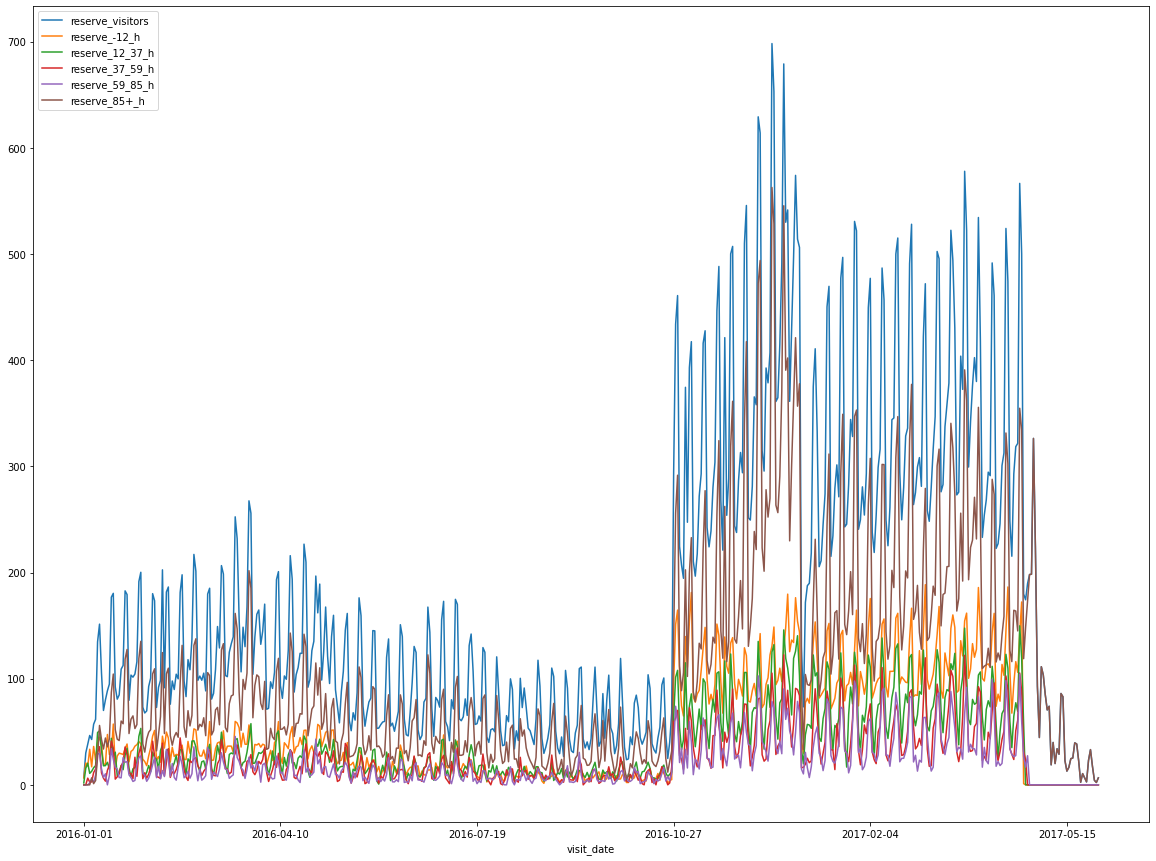

In [15]:
temp = reserve.groupby("visit_date").sum()
temp.plot(figsize=(20,15))
plt.legend(loc='upper left')

---

#### Ïû•Î•¥ - GENRE DATA 

In [16]:
air_store_info[:3]

air_store_id  air_genre_name                 air_area_name  \
0  air_0f0cdeee6c9bf3d7  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
1  air_7cc17a324ae5c7dc  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   
2  air_fee8dcf4d619598e  Italian/French  Hy≈çgo-ken K≈çbe-shi Kumoid≈çri   

    latitude   longitude  
0  34.695124  135.197853  
1  34.695124  135.197853  
2  34.695124  135.197853

In [17]:
# ÌäπÏ†ï Ïû•Î•¥ Î†àÏä§ÌÜ†ÎûëÏùò Ï¥ù ÏãùÎãπ Ïàò by area_bame
# ÎÇ¥Í∞Ä ÏõêÌïòÎäî Ïó¥ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î£πÌôî
air_genres_area = air_store_info.copy()
air_genres_area = air_genres_area[['air_store_id', 'air_genre_name', 'air_area_name']].groupby(['air_genre_name', 'air_area_name'],
                                                                                              as_index = False).count()
air_genres_area = air_genres_area.rename(columns = {'air_store_id': 'genre_in_area'})

# ÏßÄÏó≠ÏïàÏóê Ï¥ù ÏãùÎãπ Ïàò
air_area = air_store_info.copy()
air_area = air_area[['air_store_id', 'air_area_name']].groupby(['air_area_name'], as_index = False).count()
air_area = air_area.rename(columns = {'air_store_id': 'total_r_in_area'})

In [18]:
 air_area[:3]

air_area_name  total_r_in_area
0         Fukuoka-ken Fukuoka-shi Daimy≈ç               64
1  Fukuoka-ken Fukuoka-shi Hakata Ekimae               16
2       Fukuoka-ken Fukuoka-shi Imaizumi                2

---

#### WEEKEND AND HOLIDAYS

In [19]:
# Ï£ºÎßê Î∞è Ìú¥ÏùºÏùÑ ÏúÑÌïú Ï∂îÍ∞Ä Í∏∞Îä•
date_info_mod = date_info.copy()
date_info_mod['holiday_eve'] = np.zeros(date_info_mod.shape[0])
date_info_mod['holiday_eve'].iloc[:-1] = date_info_mod['holiday_flg'].copy().values[1:]
date_info_mod['non_working'] = np.where(date_info_mod['day_of_week'].isin(['Saturday', 'Sunday']) |
                                        date_info_mod['holiday_flg'] == 1, 1, 0)
date_info_mod = date_info_mod.drop('holiday_flg', axis = 1)

# Í∑ºÎ¨¥ÏùºÏàò Î∞è Ìú¥Î¨¥ÏùºÏàòÎ≥Ñ ÏãùÎãπÎãπ ÌèâÍ∑† Î∞©Î¨∏Í∞ù Ïàò
air_visit_wd = air_visit_data.join(date_info_mod.set_index('calendar_date'), on = 'visit_date')
air_visit_wd['visitors'] = air_visit_wd['visitors'].apply(lambda x: np.log1p(x)) 

# ÌèâÍ∑† visitors per restaurant
mean_df = air_visit_wd[['visitors',
                        'air_store_id',
                        'non_working']].copy().groupby(['air_store_id',
                                                        'non_working'],
                                                        as_index = False).mean()
mean_df = mean_df.rename(columns = {'visitors': 'visitors_mean'})


# Ï§ëÏïôÍ∞í visitors per restaurant
median_df = air_visit_wd[['visitors',
                          'air_store_id',
                          'non_working']].copy().groupby(['air_store_id',
                                                          'non_working'],
                                                          as_index = False).median()
median_df = median_df.rename(columns = {'visitors': 'visitors_median'})

# ÏµúÎåÄ visitors per restaurant
max_df = air_visit_wd[['visitors',
                       'air_store_id',
                       'non_working']].copy().groupby(['air_store_id',
                                                       'non_working'],
                                                       as_index = False).max()
max_df = max_df.rename(columns = {'visitors': 'visitors_max'})

# ÏµúÏÜå visitors per restaurant
min_df = air_visit_wd[['visitors',
                       'air_store_id',
                       'non_working']].copy().groupby(['air_store_id',
                                                       'non_working'],
                                                       as_index = False).min()
min_df = min_df.rename(columns = {'visitors': 'visitors_min'})

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


---

#### JOIN TABLES INTO TRAINING AND TEST SETS

In [20]:
# function for combining train/test dataset with additional information
def merge_join(df):
    # add month of visit
    df['month'] = df['visit_date'].apply(lambda x: float(str(x)[5:7]))

    # add weekday and holiday flag
    df = df.join(date_info_mod.set_index('calendar_date'), on = 'visit_date')


    # add genre and area name)
    df = df.join(air_store_info.set_index('air_store_id'), on = 'air_store_id')

    # add quantity of same genre in area
    df = pd.merge(df, air_genres_area, how = 'left',
                  left_on = ['air_genre_name', 'air_area_name'],
                  right_on = ['air_genre_name', 'air_area_name'])


    # add total quatity of restaurants in area
    df = pd.merge(df, air_area, how = 'left',
                  left_on = ['air_area_name'],
                  right_on = ['air_area_name'])

    # add reservation information
    df = pd.merge(df, reserve, how = 'left',
                  left_on = ['air_store_id', 'visit_date'],
                  right_on = ['air_store_id', 'visit_date'])

    # add visitors number mean, median, max and min per each restaurant
    df = pd.merge(df, mean_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])

    df = pd.merge(df, median_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
    
    df = pd.merge(df, max_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
    
    df = pd.merge(df, min_df, how = 'left',
                  left_on = ['air_store_id', 'non_working'],
                  right_on = ['air_store_id', 'non_working'])
    
    # change NaN to 0
    df = df.fillna(0) 
   
    return df

# combine train/test data with additional information
air_train = air_visit_data.copy()
X = merge_join(air_train)
X_test = merge_join(air_test)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252108 entries, 0 to 252107
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   air_store_id      252108 non-null  object 
 1   visit_date        252108 non-null  object 
 2   visitors          252108 non-null  int64  
 3   month             252108 non-null  float64
 4   day_of_week       252108 non-null  object 
 5   holiday_eve       252108 non-null  float64
 6   non_working       252108 non-null  int64  
 7   air_genre_name    252108 non-null  object 
 8   air_area_name     252108 non-null  object 
 9   latitude          252108 non-null  float64
 10  longitude         252108 non-null  float64
 11  genre_in_area     252108 non-null  int64  
 12  total_r_in_area   252108 non-null  int64  
 13  reserve_visitors  252108 non-null  float64
 14  reserve_-12_h     252108 non-null  float64
 15  reserve_12_37_h   252108 non-null  float64
 16  reserve_37_59_h   25

In [22]:
X_test.head()

air_store_id  visit_date  month day_of_week  holiday_eve  \
0  air_00a91d42b08b08d9  2017-04-23    4.0      Sunday          0.0   
1  air_00a91d42b08b08d9  2017-04-24    4.0      Monday          0.0   
2  air_00a91d42b08b08d9  2017-04-25    4.0     Tuesday          0.0   
3  air_00a91d42b08b08d9  2017-04-26    4.0   Wednesday          0.0   
4  air_00a91d42b08b08d9  2017-04-27    4.0    Thursday          0.0   

   non_working  air_genre_name                    air_area_name   latitude  \
0            1  Italian/French  T≈çky≈ç-to Chiyoda-ku Kudanminami  35.694003   
1            0  Italian/French  T≈çky≈ç-to Chiyoda-ku Kudanminami  35.694003   
2            0  Italian/French  T≈çky≈ç-to Chiyoda-ku Kudanminami  35.694003   
3            0  Italian/French  T≈çky≈ç-to Chiyoda-ku Kudanminami  35.694003   
4            0  Italian/French  T≈çky≈ç-to Chiyoda-ku Kudanminami  35.694003   

    longitude  ...  reserve_visitors  reserve_-12_h  reserve_12_37_h  \
0  139.753595  ...               0.0            0.0              0.0   
1  139.753595  ...               0.0            0.0              0.0   
2  139.753595  ...               0.0            0.0              0.0   
3  139.753595  ...               0.0            0.0              0.0   
4  139.753595  ...               0.0            0.0              0.0   

   reserve_37_59_h  reserve_59_85_h  reserve_85+_h  visitors_mean  \
0              0.0              0.0            0.0       2.485089   
1              0.0              0.0            0.0       3.309565   
2              0.0              0.0            0.0       3.309565   
3              0.0              0.0            0.0       3.309565   
4              0.0              0.0            0.0       3.309565   

   visitors_median  visitors_max  visitors_min  
0         2.484907      4.605170      1.098612  
1         3.367296      4.060443      0.693147  
2         3.367296      4.060443      0.693147  
3         3.367296      4.060443      0.693147  
4         3.367296      4.060443      0.693147  

[5 rows x 22 columns]

#### Î¨∏ÏûêÏó¥ Í∏∞Îä• Ïù∏ÏΩîÎî© - ENCODE STRING FEATURES

In [24]:
# one-hot encodingÏù¥ Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º ÎèÑÏ∂úÌï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§
# Í≥†Ï∞®ÏõêÏùò feature spaceÎ•º ÌîºÌïòÍ∏∞ ÏúÑÌï¥ label encodingÏùÑ ÏÇ¨Ïö©ÌïúÎã§

# Weekday
le_weekday = preprocessing.LabelEncoder()
le_weekday.fit(X['day_of_week'])
X['day_of_week'] = le_weekday.transform(X['day_of_week'])
X_test['day_of_week'] = le_weekday.transform(X_test['day_of_week'])

# Genre name
le_genre = preprocessing.LabelEncoder()
le_genre.fit(X['air_genre_name'])
X['air_genre_name'] = le_genre.transform(X['air_genre_name'])
X_test['air_genre_name'] = le_genre.transform(X_test['air_genre_name'])

# Area name
le_area = preprocessing.LabelEncoder()
le_area.fit(X['air_area_name'])
X['air_area_name'] = le_area.transform(X['air_area_name'])
X_test['air_area_name'] = le_area.transform(X_test['air_area_name'])

# id
le_id = preprocessing.LabelEncoder()
le_id.fit(X['air_store_id'])
X['air_store_id'] = le_id.transform(X['air_store_id'])
X_test['air_store_id'] = le_id.transform(X_test['air_store_id'])

#### Train Î∞è Test setÏùò ÎèôÏãú Î≥ÄÌôò - SIMULTANEOUS TRANSFORMATION OF TRAIN AND TEST SETS

In [25]:

# TRAIN SETÍ≥º TEST SETÏùÑ Ìï©Ï≥êÏ§ÄÎã§
X_all = X.append(X_test)

# date table (TRAIN SETÍ≥º TEST SET Ï†ÑÏ≤¥ Í∏∞Í∞ÑÏùÑ Ìè¨Ìï®Ìïú date tableÏùÑ ÎßåÎì§Ïñ¥ Ï§ÄÎã§)
dates = np.arange(np.datetime64(X_all.visit_date.min()),
                  np.datetime64(X_all.visit_date.max()) + 1,
                  datetime.timedelta(days=1))
ids = X_all['air_store_id'].unique()
dates_all = dates.tolist()*len(ids)
ids_all = np.repeat(ids, len(dates.tolist())).tolist()
df_all = pd.DataFrame({"air_store_id": ids_all, "visit_date": dates_all})
df_all['visit_date'] = df_all['visit_date'].copy().apply(lambda x: str(x)[:10])

# 'visit_date'ÏôÄ Í¥ÄÎ†®Îêú Îç∞Ïù¥ÌÑ∞Î°ú X_allÏùò Î≥µÏÇ¨Î≥∏ÏùÑ ÎßåÎì†Îã§
X_dates = X_all[['visit_date', 'month', 'day_of_week', 'holiday_eve', 'non_working']].copy()

# Î©îÎ™®Î¶¨ Î¨∏Ï†úÎ•º ÌîºÌïòÍ∏∞ ÏúÑÌï¥ Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ≠Ï†úÌï¥Ï§ÄÎã§
X_dates = X_dates.drop_duplicates('visit_date')

# Í∞Å Î†àÏä§ÌÜ†ÎûëÏùò Î™®Îì† ÎÇ†ÏßúÎ•º ÎÇòÌÉÄÎÇ¥Îäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ Í∞Å ÎÇ†ÏßúÏóê ÎåÄÌïú Ï†ïÎ≥¥ÏôÄ Î≥ëÌï©ÌïúÎã§
df_to_reshape = df_all.merge(X_dates,
                             how = "left",
                             left_on = 'visit_date',
                             right_on = 'visit_date')

# 'air_store_id'ÏôÄ Í¥ÄÎ†®Îêú Îç∞Ïù¥ÌÑ∞Î°ú X_allÏùò Î≥µÏÇ¨Î≥∏ÏùÑ ÎßåÎì†Îã§
X_stores = X_all[['air_store_id', 'air_genre_name', 'air_area_name', 'latitude',
                  'longitude', 'genre_in_area', 'total_r_in_area']].copy()       

# Î©îÎ™®Î¶¨ Î¨∏Ï†úÎ•º ÌîºÌïòÍ∏∞ ÏúÑÌï¥ Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ≠Ï†úÌï¥Ï§ÄÎã§
X_stores = X_stores.drop_duplicates('air_store_id')

# Í∞Å Î†àÏä§ÌÜ†ÎûëÏùò Î™®Îì† ÎÇ†ÏßúÎ•º ÎÇòÌÉÄÎÇ¥Îäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ Í∞Å Î†àÏä§ÌÜ†ÎûëÏóê ÎåÄÌïú Ï†ïÎ≥¥ÏôÄ Î≥ëÌï©ÌïúÎã§
df_to_reshape = df_to_reshape.merge(X_stores,
                                    how = "left",
                                    left_on = 'air_store_id',
                                    right_on = 'air_store_id')

# Í∞Å Î†àÏä§ÌÜ†ÎûëÏùò Î™®Îì† ÎÇ†ÏßúÎ•º ÎÇòÌÉÄÎÇ¥Îäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÍ≥º ÌäπÏ†ï ÎÇ†ÏßúÏùò Í∞Å Î†àÏä§ÌÜ†ÎûëÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Î≥ëÌï©ÌïúÎã§
df_to_reshape = df_to_reshape.merge(X_all[['air_store_id', 'visit_date', 'reserve_visitors', 'visitors_mean', 
                                       'visitors_median', 'visitors_max', 'visitors_min', 'visitors']],
                                    how = "left",
                                    left_on = ['air_store_id', 'visit_date'],
                                    right_on = ['air_store_id', 'visit_date'])

# 'visitors'Î•º Ï∂úÎ†• Î∞∞Ïó¥Î°ú Î∂ÑÎ¶¨ÌïúÎã§
Y_lstm_df = df_to_reshape[['visit_date', 'air_store_id', 'visitors']].copy().fillna(0)

# log(y+1)Î•º Ï∑®ÌïúÎã§
Y_lstm_df['visitors'] = np.log1p(Y_lstm_df['visitors'].values)

# Î†àÏä§ÌÜ†ÎûëÏù¥ Î¨∏ÏùÑ Îã´ÏùÄ ÎÇ†ÏßúÏóê ÎåÄÌïú ÌîåÎûòÍ∑∏Î•º Ï∂îÍ∞ÄÌïúÎã§
df_to_reshape['closed_flag'] = np.where(df_to_reshape['visitors'].isnull() &
                                        df_to_reshape['visit_date'].isin(X['visit_date']).values,1,0)

# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú 'visitors'Î•º ÏÇ≠Ï†úÌïúÎã§
df_to_reshape = df_to_reshape.drop(['visitors'], axis = 1)

# Í≤∞Ï∏°ÏπòÎ•º -1Î°ú Ï±ÑÏõåÏ§ÄÎã§
df_to_reshape = df_to_reshape.fillna(-1)

# 'air_store_id', 'visit_date'Í∞Ä ÏóÜÎäî df_to_reshape Î¶¨Ïä§Ìä∏
columns_list = [x for x in list(df_to_reshape.iloc[:,2:])]

# -1Í≥º 1 ÏÇ¨Ïù¥Ïùò Î™®Îì† Ïà´Ïûê Í∞íÏùÑ Î∞îÏù∏Îî©ÌïúÎã§
# Ïù¥Î≤à ÏºÄÏù¥Ïä§ÏóêÏÑúÎäî test setÏùò Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º train setÏóêÏÑú Í∞ÄÏ†∏Ïò®Îã§, Îî∞ÎùºÏÑú Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ fit/transformÎêúÎã§
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df_to_reshape[columns_list])
df_to_reshape[columns_list] = scaler.transform(df_to_reshape[columns_list])

#### SPECIFIC PREPARATION FOR NEURAL NETWORK AND ENCODER/DECODER

In [26]:
# (samples, timesteps, features)Î•º ÌëúÎ≥∏ÏúºÎ°ú XÎ•º reshapeÌïúÎã§
X_all_lstm = df_to_reshape.values[:,2:].reshape(len(ids),
                                                len(dates),
                                                df_to_reshape.shape[1]-2)

# train setÏùò Ï∂úÎ†•ÏùÑ Î∂ÑÎ¶¨ÌïòÍ≥†, ÏãúÍ≥ÑÏó¥Ïóê ÎßûÍ≤å reshapeÌïúÎã§
Y_lstm_df = Y_lstm_df.loc[Y_lstm_df['visit_date'].isin(X['visit_date'].values) &
                          Y_lstm_df['air_store_id'].isin(X['air_store_id'].values),]
Y_lstm = Y_lstm_df.values[:,2].reshape(len(X['air_store_id'].unique()),
                                       len(X['visit_date'].unique()),
                                       1)

# test dates
n_test_dates = len(X_test['visit_date'].unique())

# t-1, t-2, ... t-7Ïùò Î∞©Î¨∏Ïûê ÏàòÎ•º ÏúÑÌïú features Ï∂îÍ∞ÄÌïúÎã§
t_minus = np.ones([Y_lstm.shape[0],Y_lstm.shape[1],1])
for i in range(1,8):
    temp = Y_lstm.copy()
    temp[:,i:,:] = Y_lstm[:,0:-i,:].copy()
    t_minus = np.concatenate((t_minus[...], temp[...]), axis = 2)
t_minus = t_minus[:,:,1:]
print ("t_minus shape", t_minus.shape)


# X_allÏùÑ training data, test dataÎ°ú Î∂ÑÎ¶¨ÌïúÎã§
X_lstm = X_all_lstm[:,:-n_test_dates,:]
X_lstm_test = X_all_lstm[:,-n_test_dates:,:]

# feature vectorÏóê t-1, t-2 ... t-7 visitorsÎ•º Ï∂îÍ∞ÄÌïúÎã§
X_lstm = np.concatenate((X_lstm[...], t_minus[...]), axis = 2)

# training setÏùÑ train set, validation setÏúºÎ°ú ÎÇòÎà†Ï§ÄÎã§
X_tr = X_lstm[:,39:-140,:]
Y_tr = Y_lstm[:,39:-140,:]

X_val = X_lstm[:,-140:,:]
Y_val = Y_lstm[:,-140:,:]

t_minus shape (829, 478, 7)


### ENCODER-DECODER MODEL

#### MODEL FOR ENCODER AND DECODER 

In [28]:
num_encoder_tokens = X_lstm.shape[2]
latent_dim = 64 # "kernel run out of time"ÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù Ïûò Ï°∞Ï†ïÌï¥Ï§ÄÎã§

# encoder training
encoder_inputs = Input(shape = (None, num_encoder_tokens))
encoder = LSTM(latent_dim, 
               batch_input_shape = (1, None, num_encoder_tokens),
               stateful = False,
               return_sequences = True,
               return_state = True,
               recurrent_initializer = 'glorot_uniform')

encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c] # 'encoder_outputs'Îäî Î¨¥ÏãúÎêòÍ≥† ÏÉÅÌÉúÎßå Ïú†ÏßÄÎêúÎã§

# 'encoder_states'Î•º Ï¥àÍ∏∞ ÏÉÅÌÉúÎ°ú ÏÇ¨Ïö©ÌïòÎäî, Decoder training
decoder_inputs = Input(shape=(None, num_encoder_tokens))

decoder_lstm_1 = LSTM(latent_dim,
                      batch_input_shape = (1, None, num_encoder_tokens),
                      stateful = False,
                      return_sequences = True,
                      return_state = False,
                      dropout = 0.2,
                      recurrent_dropout = 0.2) # True

decoder_lstm_2 = LSTM(32, # "kernel run out of time"ÏùÑ Î∞©ÏßÄÌïòÎèÑÎ°ù Ïûò Ï°∞Ï†ïÌï¥Ï§ÄÎã§
                     stateful = False,
                     return_sequences = True,
                     return_state = True,
                     dropout = 0.2,
                     recurrent_dropout = 0.2)

decoder_outputs, _, _ = decoder_lstm_2(decoder_lstm_1(decoder_inputs, initial_state = encoder_states))
decoder_dense = TimeDistributed(Dense(Y_lstm.shape[2], activation = 'relu'))
decoder_outputs = decoder_dense(decoder_outputs)

# training model
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
training_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### GENERATOR APPLIED TO FEED ENCODER AND DECODER

In [29]:
# Ïó∞ÏÜçÎêú 39ÏùºÏùò ÏãúÍ≥ÑÏó¥ÏùÑ ÎûúÎç§ÌïòÍ≤å ÏÉùÏÑ±ÌïòÎäî ÏÉùÏÑ±Í∏∞
# Îã§ÏùåÏùò ÏãúÍ≥ÑÏó¥ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ 3DÏùò ÌòïÌÉúÎ•º Í∞ÄÏßÑÎã§: 829 restaurants * 39 days * num_features
def dec_enc_n_days_gen(X_3d, Y_3d, length):
    while 1:
        decoder_boundary = X_3d.shape[1] - length - 1
        
        encoder_start = np.random.randint(0, decoder_boundary)
        encoder_end = encoder_start + length
        
        decoder_start = encoder_start + 1
        decoder_end = encoder_end + 1
        
        X_to_conc = X_3d[:, encoder_start:encoder_end, :].astype(float)
        Y_to_conc = Y_3d[:, encoder_start:encoder_end, :].astype(float)
        X_to_decode = X_3d[:, decoder_start:decoder_end, :].astype(float)
        Y_decoder = Y_3d[:, decoder_start:decoder_end, :].astype(float)
        
        yield([X_to_conc,
               X_to_decode],
               Y_decoder)

#### TRAINING

In [31]:
# X_tr/Y_trÎ°ú ÌõàÎ†®, X_val/Y_valÎ°ú Í≤ÄÏ¶ùÌïúÎã§
# validation dataÏóê ÎåÄÌïú validation ÌõàÎ†®ÏùÑ ÏàòÌñâÌïòÎ†§Î©¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ ÏïÑÎãå Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú validation ÌõàÎ†®ÏùÑ ÏàòÌñâÌïúÎã§
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïù¥Ïô∏Ïùò Í∏∞Í∞ÑÏóê ÎåÄÌï¥ Ïú†Ìö®ÏÑ± Í≤ÄÏÇ¨Î•º ÏàòÌñâÌïúÎã§
'''
training_model.fit_generator(dec_enc_n_days_gen(X_tr, Y_tr, 39),
                             validation_data = dec_enc_n_days_gen(X_val, Y_val, 39),
                             steps_per_epoch = X_lstm.shape[0],
                             validation_steps = X_val.shape[0],
                             verbose = 1,
                             epochs = 1)
'''

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú ÌõàÎ†®
training_model.fit_generator(dec_enc_n_days_gen(X_lstm[:,:,:], Y_lstm[:,:,:], 39),
                            steps_per_epoch = X_lstm[:,:,:].shape[0],
                            verbose = 1,
                            epochs = 1)

829/829 [==============================] - 222s 267ms/step - loss: 0.1868


#### PREDICTION FUNCTION

In [ ]:
# Ìï®ÏàòÎäî Ï≤´ Î≤àÏß∏ ÏòàÏ∏°Ïùº Ï†ÑÍπåÏßÄ 39ÏùºÏù¥ Í±∏Î¶∞Îã§(input_seq)
# Í∑∏Îü∞ Îã§Ïùå, Ïù∏ÏΩîÎçîÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ 39Ïùº ÎèôÏïà hidden statesÎ•º ÏãùÎ≥ÑÌïúÎã§
# Îã§ÏùåÏúºÎ°ú, ÎîîÏΩîÎçîÎäî Ïù∏ÏΩîÎçîÍ∞Ä Ï†úÍ≥µÌïòÎäî hidden statesÎ•º Ï∑®ÌïúÎã§
# 2ÏùºÏ∞®Î∂ÄÌÑ∞ 40ÏùºÏ∞®ÍπåÏßÄ Î∞©Î¨∏Ïûê ÏàòÎ•º ÏòàÏ∏°ÌïúÎã§
# 40ÏùºÏùÄ target_seqÏùò Ï≤´ Î≤àÏß∏ ÎÇ†ÏùÑ ÏùòÎØ∏ÌïúÎã§

# 40ÏùºÏ∞®Ïùò ÏòàÏ∏° Í∞íÏùÄ 41ÏùºÏùò ÌîºÏ≥êÏóê Ï∂îÍ∞ÄÎêúÎã§
# Í∑∏Îü∞ Îã§Ïùå Ìï®ÏàòÎäî 2ÏùºÏóêÏÑú 40ÏùºÍπåÏßÄÏùò Í∏∞Í∞ÑÏù¥ ÏÜåÏöîÎêòÎ©∞, ÎåÄÏÉÅ ÏãúÌÄÄÏä§Ïùò Î™®Îì† ÎÇ†ÏßúÍ∞Ä ÏòàÏ∏°ÏùÑ ÏñªÏùÑ ÎïåÍπåÏßÄ ÌîÑÎ°úÏÑ∏Ïä§Î•º Î∞òÎ≥µÌïúÎã§

# Ìï®ÏàòÏùò Ï∂úÎ†•ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏòàÏ∏°Ïù¥ Ìè¨Ìï®Îêú Î≤°ÌÑ∞ÏûÖÎãàÎã§.
# shape: 820 restaurants * 39 days * 1 predicted visitors amount


def predict_sequence(inf_enc, inf_dec, input_seq, Y_input_seq, target_seq):
    # encoderÏóê ÏùòÌï¥ ÏÉùÏÑ±Îêú ÏûÖÎ†• ÏãúÌÄÄÏä§Ïùò ÏÉÅÌÉú 
    state = inf_enc.predict(input_seq)
    
    # target ÏãúÌÄÄÏä§Î•º X_lstm_testÏôÄ Í∞ôÏùÄ Î™®ÏñëÏúºÎ°ú Ï†úÌïúÌï¥Ï§ÄÎã§
    target_seq = target_seq[:,:, :X_lstm_test.shape[2]]
    
    
    # Ïù¥Ï†ÑÏùò 7ÏùºÏù¥ Ìè¨Ìï®Îêú yÏóê ÎåÄÌïú Î≤°ÌÑ∞Î•º ÎßåÎì†Îã§
    t_minus_seq = np.concatenate((Y_input_seq[:,-1:,:], input_seq[:,-1:, X_lstm_test.shape[2]:-1]), axis = 2)
    
    # prediction Î£®ÌîÑÏùò Í∞Å Î∞òÎ≥µÏóêÏÑú ÏàòÏ†ïÎê† ÌòÑÏû¨ ÏãúÌÄÄÏä§
    current_seq = input_seq.copy()
    
    
    # output ÏòàÏ∏°
    output = np.ones([target_seq.shape[0],1,1])
    for i in range(target_seq.shape[1]):
        # new dayÏóê ÎåÄÌïú featuresÏóê Ïù¥Ï†ÑÏùò 7ÏùºÏóê ÎåÄÌïú Î∞©Î¨∏ÏûêÎ•º Ï∂îÍ∞ÄÌïúÎã§
        new_day_features = np.concatenate((target_seq[:,i:i+1,:], t_minus_seq[...]), axis = 2)
        
        # ÏòàÏ∏° Í∏∞Í∞ÑÏùÑ ÌïòÎ£® ÏïûÏúºÎ°ú Ïù¥ÎèôÌï¥Ï§ÄÎã§
        current_seq = np.concatenate((current_seq[:,1:,:], new_day_features[:,]), axis = 1)
        
        
        # visitors Ïñë ÏòàÏ∏°
        pred = inf_dec.predict([current_seq] + state)
        
        # t_minus_seq ÏóÖÎç∞Ïù¥Ìä∏
        t_minus_seq = np.concatenate((pred[:,-1:,:], t_minus_seq[...]), axis = 2)
        t_minus_seq = t_minus_seq[:,:,:-1]        
        
        # update predicitons list ÏóÖÎç∞Ïù¥Ìä∏
        output = np.concatenate((output[...], pred[:,-1:,:]), axis = 1)
        
        # state ÏóÖÎç∞Ïù¥Ìä∏
        state = inf_enc.predict(current_seq)
    
    return output[:,1:,:]

#### INFERENCE ENCODER AND DECODER

In [ ]:
# inference(Ï∂îÎ°†) encoder
encoder_model = Model(encoder_inputs, encoder_states)

# inference decoder
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs,_,_ = decoder_lstm_2(decoder_lstm_1(decoder_inputs,
                                                    initial_state = decoder_states_inputs))
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs])

#### VALIDATION ON PERIOD OUTSIDE OF TRAINING DATA 

In [ ]:
# "training_model"ÏùÄ X_trÏóêÏÑú ÌõàÎ†®Îêú ÌõÑÏóê, validationÏóêÏÑú ÏÇ¨Ïö©Ìï¥Ïïº ÌïúÎã§

'''
val_list = []

for i in range(5):
    
    start = np.random.randint(0, int(X_val.shape[1]-X_lstm_test.shape[1]*2))
    end = start+39
    dec_start = end
    dec_end = dec_start+39

    predictions = predict_sequence(encoder_model,
                                   decoder_model,
                                   X_val[:,start:end,:],
                                   Y_val[:,start:end,:],
                                   X_val[:,dec_start:dec_end,:])
    score = rmsle(Y_val[:,dec_start:dec_end,:].reshape(X_val[:,start:end,:].shape[0]*39), 
                  predictions.reshape(X_val[:,start:end,:].shape[0]*39))
    val_list.append(score)

print (np.asarray(val_list).mean())
print (np.asarray(val_list).std())
'''

# ÌÖåÏä§Ìä∏ Í∞í ÏòàÏ∏°
enc_dec_pred = predict_sequence(encoder_model,
                                decoder_model,
                                X_lstm[:,-X_lstm_test.shape[1]:,:].astype(float),
                                Y_lstm[:,-X_lstm_test.shape[1]:,:].astype(float),
                                X_lstm_test[:,:,:].astype(float))

#### Add predicted test values to submission dataset

In [ ]:
# Ï∞∏Í≥†: ÏãúÍ≥ÑÏó¥Ïùò ÏàúÏÑúÎ•º Ïú†ÏßÄÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöî
# Îî∞ÎùºÏÑú test setÏóêÎäî train setÍ≥º Í∞ôÏùÄ ÏàúÏÑúÎ°ú 829Í∞úÏùò ÎùºÏù∏Ïù¥ Î™®Îëê Ìè¨Ìï®ÎêúÎã§
# Ïù¥Î•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ 'air_store_id'Îäî X_testÍ∞Ä ÏïÑÎãå XÏóêÏÑúÏôÄ Í∞ôÏù¥ ÏÇ¨Ïö©ÎêúÎã§(ÏïÑÎûò 'test' Î≥ÄÏàòÏùò Îëê Î≤àÏß∏ Ï§Ñ)
# submission Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê Í¥ÄÎ†®Îêú Í≤∞Í≥ºÎßå Î≥ëÌï©ÎêúÎã§

test = df_to_reshape.loc[df_to_reshape['visit_date'].isin(X_test['visit_date'].values) &
                         df_to_reshape['air_store_id'].isin(X['air_store_id'].values),]


# ÏòàÏ∏°Í∞íÏùÑ Ï¥àÍ∏∞ ÌòïÌÉúÎ°ú reshape
test_pred = enc_dec_pred.reshape(test.shape[0], 1)
test_pred_exp = np.exp(test_pred) - 1.0
test_pred_exp[test_pred_exp<0] = 0

# 'air_store_id', 'visit_date'Í∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê ÏòàÏ∏° Ï∂îÍ∞Ä
test_df_pred = test[['air_store_id', 'visit_date']].copy()
test_df_pred['predicted'] = test_pred_exp

# 'air_store_id'Ïùò Ïó≠Î≥ÄÌôò
test_df_pred['air_store_id'] = le_id.inverse_transform(test_df_pred['air_store_id'])

# submission.csv ÌååÏùº ÎßàÎ¨¥Î¶¨
submission_df = submission_lstm.merge(test_df_pred,
                                     how = 'left',
                                     left_on = ['air_store_id', 'visit_date'],
                                     right_on = ['air_store_id', 'visit_date'])

submission_df['visitors'] = submission_df['predicted']
submission_df = submission_df.drop(['air_store_id', 'visit_date', 'predicted'], axis = 1)
submission_df.to_csv('submission.csv', index = False)

![](https://8888-wadwcmvhk1c8fvjnvlw34oxdk.e.aiffel-4.ainetwork.ai/files/aiffel/hackathon/submission.JPG)

---
## Ï∞∏Í≥† kaggle
**Q1**. ÏÑ†Ï†ïÏù¥Ïú†
- ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨Ïò¨Îïå ÏùµÏàôÌï¥ Î≥¥Ïó¨ÏÑú Í≥µÎ∂ÄÌïòÍ∏∞Ïóê Ï¢ãÏùÑ Í≤É Í∞ôÏïÑ Ï∞∏Í≥†ÌïòÏòÄÎã§.
- Í≥ºÍ±∞Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ ÎØ∏ÎûòÎ•º ÏòàÏ∏°ÌïòÎäîÍ≤å Î™©ÌëúÏù¥Í∏∞Ïóê LSTMÏù¥ Ï†ÅÌï©ÌïòÎã§Í≥† ÌåêÎã®Ìï¥ÏÑú Ï∞∏Í≥† ÌïòÏòÄÎã§.


https://www.kaggle.com/ievgenvp/lstm-encoder-decoder-via-keras-lb-0-5 - LSTM \
https://www.kaggle.com/maestroyi/restaurant-visitor-forecasting-eda-with-r - Ï†ÑÏ≤òÎ¶¨ & ÏãúÍ∞ÅÌôî


## ÎßàÎ¨¥Î¶¨
**Q1**. EDA Î∞è VisualizationÏù¥ Ï∂©Ïã§Ìûà ÏàòÌñâÎêòÏóàÎäîÍ∞Ä? (25%)
- ÏãúÍ∞ÅÌôîÎ•º Ïñ¥ÎñªÍ≤å Ìï¥Ïïº ÌïòÎäîÏßÄ ÏïåÏïÑÍ∞ÄÎäî Í≥µÎ∂ÄÌïòÎäî Î™©Ï†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎçòÍ≤É Í∞ôÎã§.
- ÏµúÎåÄÌïúÏúºÎ°ú ÌåÄÏõê Î™®Îëê ÎÖ∏Î†•ÌïòÏòÄÏßÄÎßå ÏôÄ~ Íµ¨ÌòÑ Ìï¥Î¥§Îã§ Ï†ïÎèÑÏù∏Í≤É Í∞ôÎã§.

**Q2**. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Í∞Ä Ï†ÅÏ†àÌûà ÏàòÌñâÎêòÏóàÎäîÍ∞Ä? (25%)
- Ïö∞Ïàò ÌñàÎçò kaggleÏùÑ Ï∞∏Í≥† ÌïòÏó¨ ÏßÑÌñâ ÌïòÏòÄÍ∏∞Ïóê Ï†ÅÏ†àÌûà ÏàòÌñâÎêòÏóàÎã§Í≥† Î≥∏Îã§.
- Ï°∞Í∏àÏî©ÏùÄ Îã§Î•¥ÏßÄÍ≤†ÏßÄÎßå Î≥ÑÎã§Î•∏ ÌÅ∞ Ï∞®Ïù¥Ï†êÏùÄ ÏóÜÏñ¥ÏÑú ÏïÑÏâ¨ÏõÄÏù¥ ÎÇ®ÎäîÎã§.

**Q3**. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Í≥ºÏ†ïÏù¥ Ï∂©Î∂ÑÌûà ÏÑ§ÎìùÎ†• ÏûàÎäîÍ∞Ä? (25%)
- Ïö∞Ïàò ÌñàÎçò kaggleÏùÑ Ï∞∏Í≥† ÌïòÏó¨ ÏßÑÌñâ ÌïòÏòÄÍ∏∞Ïóê Ï†ÅÏ†àÌûà ÏàòÌñâÎêòÏóàÎã§Í≥† Î≥∏Îã§.
- Q2ÏôÄ Í∞ôÏù¥ Î≥ÑÎã§Î•∏ ÌÅ∞ Ï∞®Ïù¥Ï†êÏùÄ ÏóÜÏñ¥ÏÑú ÏïÑÏâ¨ÏõÄÏù¥ ÎÇ®ÎäîÎã§.

**Q4**. Public ScoreÍ∞Ä Ïö∞ÏàòÌïúÍ∞Ä? (10%)
- Ï≤´ ÏãúÎèÑÎ°ú 0.5300 ÏàòÏ§ÄÏù¥ÏóàÍ≥† ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú 0.5048Ïù¥ ÎÇòÏôîÎã§.

**Q5**. ÌåÄÏõêÎÅºÎ¶¨ ÏÑúÎ°ú ÌòëÎ†•ÌïòÏó¨ ÌîÑÎ°úÏ†ùÌä∏Î•º ÏàòÌñâÌïòÍ≥† Î∞úÌëúÎ•º ÏßÑÌñâÌïòÏòÄÎäîÍ∞Ä? (15%)
- Ïó¨Îü¨ kaggleÏùÑ Ï∞∏Í≥† ÌïòÎ©¥ÏÑú ÏÑúÎ°ú Í≥µÏú†Î•º ÏßÑÌñâ ÌïòÏòÄÏäµÎãàÎã§.
- Î™®ÎëêÍ∞Ä ScoreÎ•º Ïò¨Î¶¨Í∏∞ ÏúÑÌïú ÏûëÏóÖÏóê Ï∞∏Ïó¨ ÌïòÏòÄÏäµÎãàÎã§.
- ÏûòÌïòÏßÑ Î™ªÌïòÏßÄÎßå Îã§Í∞ôÏù¥ Ïó¥Ïã¨ÌûàÌïòÏó¨ Ï∞∏Ïó¨ ÌïòÏòÄÏäµÎãàÎã§.


## ÎäêÎÇÄÏ†ê

#### ÌåÄÏû• ÏÑúÏó∞Îãò üëç
-  Ìï¥Ïª§ÌÜ§ÏùÑ ÏãúÏûëÌïòÎ©¥ÏÑú Ï≤òÏùåÏóê Ïñ¥ÎñªÍ≤å ÏßÑÌñâÌï† Í≤ÉÏù∏ÏßÄ Î∞©Ìñ•ÏùÑ Ïû°Îäî Î∂ÄÎ∂ÑÍ≥º Ï†ÅÏ†àÌïú Ï∞∏Í≥† ÏûêÎ£åÎ•º Ï†ïÌïòÎäî Î∂ÄÎ∂ÑÎèÑ ÏâΩÏßÄ ÏïäÏïòÍ≥†
<br/> Îã§Î•∏ ÏÇ¨ÎûåÏùò ÏΩîÎìúÎ•º Î≥¥Î©¥ÏÑú Ïñ¥Îñ§ ÏãùÏúºÎ°ú ÏûëÏÑ±ÏùÑ ÌñàÎäîÏßÄ Ïñ¥Îñ§ ÏùòÎèÑÎ°ú Ïù¥Î†áÍ≤å ÏûëÏÑ±ÏùÑ Ìïú Í±¥ÏßÄ ÌååÏïÖÌïòÎäî Î∂ÄÎ∂ÑÏù¥ Ï†úÏùº Ïñ¥Î†§Ïõ†Îçò Í≤É Í∞ôÎã§.
<br/> Ï≤òÏùåÏóê Ï∞∏Í≥†Ìïú ÏûêÎ£åÎäî Ïä§ÏΩîÏñ¥ÏôÄ ÏãúÍ∞ÅÌôî ÌëúÌòÑÏù¥ Ïûò ÎêòÏñ¥ÏûàÎäî Í≤ÉÎßå ÏßëÏ§ëÏùÑ Ìï¥ÏÑú Í≥†Î•∏ ÏûêÎ£åÎùº 
<br/> ÏÑ∏ÏÑ∏ÌïòÍ≤å Ïñ¥ÎñªÍ≤å ÏßúÏó¨ ÏûàÎäîÏßÄÎ•º Î™®Î•¥Í≥† ÏãúÏûëÏùÑ ÌñàÎäîÎç∞ ÌïòÎÇòÌïòÎÇò ÏΩîÎìúÎ•º Î∂ÑÏÑùÌï¥Î≥¥Î©¥ÏÑú Ïã§ÌñâÌïòÎäî Ï§ëÏóê 
<br/> data merge ÌïòÎäî Í≥ºÏ†ïÏóêÏÑú hpg Î∂ÄÎ∂ÑÏùò Í≤∞Ï∏°Ïπò ÎïåÎ¨∏Ïóê Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏûòÎêòÏßÄ ÏïäÏïÑ ÎÇúÌï≠ÏùÑ Í≤™ÏóàÎã§. 
<br/> Í∑∏ÎûòÏÑú Í±∞Ïùò ÏãúÍ∞ÑÏù¥ ÎÇ®ÏßÄ ÏïäÏùÄ ÏÉÅÌÉúÏóêÏÑú Îã§Ïãú Ï∞∏Í≥†Ìï† ÏûêÎ£åÎì§ÏùÑ Ï∞æÏïÑ ÏßÑÌñâÏùÑ ÌñàÎäîÎç∞ 
<br/> Îã§Ïãú Ï∞æÏùÄ Ï∞∏Í≥† ÏûêÎ£å Ïó≠Ïãú Ïôú LSTMÏùÑ ÏÇ¨Ïö©ÌñàÎäîÏßÄ Í∞ôÏùÄ Î∂ÄÎ∂ÑÎì§ÏùÑ Ïù¥Ìï¥ÌïòÎäîÎç∞ÎèÑ Ïò§Îûò Í±∏Î†∏Îã§.
<br/> Í¥ÄÎ†® Ï∫êÍ∏Ä ÎÖ∏ÎìúÎèÑ ÏßÑÌñâÏùÑ ÌïòÏòÄÍ≥† ÏãúÍ∞ÅÌôîÎÇò Ï†ÑÏ≤òÎ¶¨ ÌïòÎäî Î∂ÄÎ∂ÑÎèÑ Î∞∞Ïö¥ ÎÇ¥Ïö©Ïù∏Îç∞ 
<br/> Î∞∞Ïö¥ Í±∏ Ï∫êÍ∏Ä Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Î°ú Ï†ÅÏö©Ìï¥Í∞ÄÎ©¥ÏÑú ÏßÑÌñâ ÌïòÎäîÍ≤å Ï†ïÎßê ÌûòÎì§ÏóàÎã§.
<br/><br/> Ìï¥Ïª§ÌÜ§ÏùÑ ÌïòÎ©¥ÏÑú ÌååÏù¥Ïç¨ Í≥µÎ∂ÄÎ•º Îçî ÍπäÍ≤å Í≥µÎ∂ÄÎ•º Ìï¥ÏïºÍ≤†Îã§Í≥† Ï†àÏã§ÌïòÍ≤å ÎäêÍºàÍ≥† ÎÖ∏Îìú Í≥µÎ∂ÄÌïòÎ©¥ÏÑú Ïù¥Ìï¥ÌñàÎã§Í≥† ÏÉùÍ∞ÅÌïòÍ≥† ÎÑòÏñ¥Í∞îÎäîÎç∞ 
<br/> Ï†ÅÏö©ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïòÍ≥† Îã§Î•∏ ÏÇ¨ÎûåÎì§ÏóêÍ≤å ÏÑ§Î™ÖÏùÑ Ï†ïÌôïÌïòÍ≤å ÌïòÏßÄ Î™ªÌïòÎäî Î∂ÄÎ∂ÑÏóêÏÑú 'ÎÇ¥Í∞Ä Ïù¥Ìï¥Î•º ÍπäÍ≤å Î™ªÌñàÍµ¨ÎÇò' ÌïòÍ≥† ÎßéÏù¥ Íπ®Îã¨ÏïòÍ≥† 
<br/> Ï¢Ä Îçî ÏÑ∏ÏÑ∏ÌïòÍ≤å Í≥µÎ∂ÄÎ•º Ìï¥Î¥êÏïºÍ≤†Îã§Í≥† ÏÉùÍ∞ÅÌñàÎã§.
<br/> ÎßéÏùÄ Ïñ¥Î†§ÏõÄÏù¥ ÏûàÏóàÏßÄÎßå Í≥µÎ∂Ä Î™©Ï†ÅÏúºÎ°ú ÏãúÏûëÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ïó¨Îü¨ ÏóêÎü¨Îì§Î°ú Ïù∏Ìï¥ Í∑∏ Î∂ÄÎ∂ÑÏù¥ ÎßéÏù¥ Ï±ÑÏõåÏ°åÍ≥† 
<br/> Í≥µÎ∂Ä Ïô∏ÏóêÎèÑ Ìï¥Í≤∞ÌïòÎäî Í≥ºÏ†ïÏóêÏÑú Ï°∞ÏõêÎì§Í≥º Ìï®Íªò ÌòëÎ†•Ìï¥ÏÑú ÌïòÍ±∞ÎÇò Îã§Î•∏ Ï°∞ÏõêÎ∂ÑÎì§Ïùò ÎèÑÏõÄÏùÑ Î∞õÏïÑ Ìï®Íªò Ìï¥Í≤∞ÌïòÎäî Í≥ºÏ†ïÏù¥ ÎúªÍπäÏóàÎã§.

#### ÌåÄÏõê ÏÉÅÌù¨Îãò üëç
- ÏÉÅÏúÑ Ïä§ÏΩîÏñ¥Îßå Î≥¥Í≥† Ïª®ÌÖçÌïú Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÄ Î¨∏Ï†úÍ∞Ä ÏóÜÏùÑ Í≤ÉÏù¥ÎùºÎäî ÎßπÏã†Ïóê Îπ†Ï†∏ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÖãÏùò ÏÑ∏Î∂Ä ÏûêÎ£åÎì§ÏùÑ ÎØ∏Ï≥ê ÌôïÏù∏ÌïòÏßÄ Î™ªÌïòÍ≥† ÏãúÏûëÌïòÏòÄÎã§.
<br/> Kaggle Îç∞Ïù¥ÌÑ∞ ÏÖã ÌïúÍµ≠Ïñ¥ Î≤ÑÏ†Ñ ÏûêÎ£åÍ∞Ä ÎßéÏßÄ ÏïäÏïÑ Ï∞∏Í≥†ÌïòÎäîÎç∞ ÌïúÍ≥ÑÍ∞Ä ÏûàÏóàÍ≥†, 
<br/> ÏãúÍ∞ÑÏù¥ ÍΩ§ ÏßÄÎÇúÌõÑ ÏóêÎäî Îπ†Ï†∏ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º Î∞úÍ≤¨ÌïòÎ©∞
<br/> Ïû¨ Íµ¨ÌòÑÏùÑ ÏúÑÌï¥ Í≤∞Ï∏°Ïπò Í∞úÏàòÎÇò, Í∑∏ÎûòÌîÑÎ°ú Î∞∞Ïõ†Îçò Î∂ÄÎ∂Ñ Íµ¨ÌòÑÏùÄ ÏßÑÌñâÏùÑ ÌïòÏòÄÏßÄÎßå 
<br/> ÏÑ∏Î∂ÄÌñâ Íµ¨ÌòÑ Îì±ÏùÄ Î∞©Î≤ïÏùÑ Ïïå ÏàòÍ∞Ä ÏóÜÏñ¥ Ìè¨Í∏∞Î•º Ìï† ÏàòÎ∞ñÏóê ÏóÜÏóàÎã§. ÎÇúÏù¥ÎèÑÎèÑ ÎßûÏßÄ ÏïäÎäîÎã§Îäî ÌåêÎã®ÌïòÏóê Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ ÏÖãÏúºÎ°ú ÏßÑÌñâÏùÑ Ï∂îÍ∞Ä ÌïòÏòÄÎã§. <br/> Îç∞Ïù¥ÌÑ∞ ÏÖã Íµ¨ÏÑ±ÏùÄ ÏûòÎêòÏñ¥ ÏûàÏúºÎÇò Ïã§Ï†ú ÏãúÍ∞ÅÌôîÌï¥ Î≥¥ÏïòÏùÑ Îïå Íµ¨ÌòÑÏùò Ïñ¥Î†§ÏõÄÏùÑ ÎäêÍºàÎã§.
<br/><br/> Ï∫êÍ∏Ä Ïä§ÌÑ∞ÎîîÎ•º ÌÜµÌï¥ Ïã§Î†• Ìñ•ÏÉÅÏùÑ Í∏∞ÎåÄ ÌñàÏóàÎäîÎç∞ ÏïÑÏßÅ Ïã§Î†•Ïù¥ Î∂ÄÏ°±ÌïòÎã§Îäî Í≤ÉÏóê Î∞òÏÑ±ÌïòÍ≤å ÎêòÏóàÍ≥† 
<br/> ÎÖ∏ÎìúÏóê ÎåÄÌïú Ïù¥Ìï¥ÎèÑÎ∂ÄÌÑ∞ Îçî ÎÜíÏù¥Îäî Í≤å Ï¢ãÍ≤†Îã§ ÏÉùÍ∞ÅÎêòÏóàÎã§.
<br/> Ïò®ÎùºÏù∏ÏúºÎ°ú Í∞úÍ∞úÏù∏Ïùò ÌïôÏäµÏúºÎ°ú ÏßÑÌñâÌïòÎã§ Î≥¥Îãà Í∞ÑÏ†ëÌïôÏäµÏùò Í≤ΩÌóòÏù¥ Îñ®Ïñ¥Ï°åÎäîÎç∞ 
<br/> Ïò§ÌîÑÎ°ú ÏßÑÌñâÌïòÎ©¥ÏÑú ÏΩîÎî©Í≥º Ìà¥ ÏÇ¨Ïö©Î≤ïÏóê ÎåÄÌïú ÏàôÎ†®Ïù¥ Ï°∞Í∏à ÎÇòÏïÑÏ°åÎã§.
<br/> Îã§Î•∏ Î∂ÑÎì§Ïùò ÏùòÍ≤¨ÏùÑ Í∞ôÏù¥ Îì§ÏúºÎ©¥ÏÑú ÌïòÎäî Í≤ÉÏù¥ ÌòºÏûê Ïù¥Ìï¥ÌïòÎäî Í≤ÉÎ≥¥Îã§ ÌôïÏã§Ìûà ÏãúÍ∞Ñ Ï†àÏïΩÏóê ÎèÑÏõÄÏù¥ ÎêòÏóàÍ≥†, 
<br/> ÎßâÌûàÎäî Î∂ÄÎ∂ÑÏù¥ ÏûàÏùÑ ÎïåÎßàÎã§ Í≤ΩÏüÅÏ†ÅÏù¥ÏßÄ ÏïäÎäî ÌôòÍ≤ΩÏóêÏÑú ÌåÄ ÎÇ¥, ÌÉÄÌåÄÏùò ÎèôÎ£åÎì§Ïù¥ Ï°∞Ïñ∏ Îì±ÏúºÎ°ú Íµ¨ÌòÑÎêòÎäî Í±∏ Î≥¥Î©¥ÏÑú Í≥µÏú†Ïùò Í∞êÏÇ¨Ìï®ÏùÑ ÎäêÍºàÎã§.

#### ÌåÄÏõê Í∞ïÏÇ∞Îãò üëç
- Ìï¥Ïª§ÌÜ§ Ï†ÑÍπåÏßÄ ÎÖ∏ÎìúÎ•º ÏßÑÌñâÌïòÎ©¥ÏÑú Í∏∞Î≥∏Ï†ÅÏù∏ ÌùêÎ¶ÑÏóê ÎåÄÌïú Ïù¥Ìï¥Îäî Ï∂©Î∂ÑÌïòÍ≤å ÏßÑÌñâÎêòÏóàÎã§Í≥† ÏÉùÍ∞ÅÏùÄ ÌñàÏóàÏäµÎãàÎã§.
<br/> Í∑∏Îü¨ÎÇò Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î•º Î∞õÏïÑÎ≥¥Îãà Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Î•º Ìï¥Ïïº ÌïòÎäîÏßÄ ÎßâÎßâÌñàÍ≥† ÎãµÎãµÌïú Í≤å ÏûàÏóàÏäµÎãàÎã§.
<br/> Í∑∏ÎûòÏÑú ÏÉÅÏúÑ Ïä§ÏΩîÏñ¥ Ï∫êÍ∏ÄÏùÑ Ï∞∏Í≥†ÌïòÏó¨ ÏßÑÌñâÌïòÏòÄÍ≥†. Ï≤´ÎÇ† ÏßÑÌñâÌñàÎçò Ï†ÑÏ≤òÎ¶¨Í∞Ä Î∞ïÏÇ¥(?)Ïù¥ ÎÇòÏÑú ÏïΩÍ∞Ñ ÌùîÎì§Î†∏ÏßÄÎßå
<br/> ÌåÄÏõê Î™®Îëê Î™ªÌï¥ÎèÑ Í≥µÎ∂ÄÌñàÎã§Îäî Í≤ÉÏóê ÎßåÏ°±ÌïòÎ©¥ÏÑú Ï†ÑÎ∞òÏ†ÅÏù∏ ÌùêÎ¶ÑÏùÑ ÏïåÍ≥† ÎÅùÍ∞ÄÏßÄÎäî Ìï¥Î≥¥ÏûêÍ∞Ä Ï£ºÎêú Ï∑®ÏßÄ ÏòÄÍ∏∞Ïóê ÏÑúÎ°ú ÏÜåÌÜµÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú
<br/> Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Ïóê ÎåÄÌï¥ ÏïåÏïÑ Í∞îÎçò Í≤É Í∞ôÏäµÎãàÎã§. ÌöåÍ≥†Î•º ÌïòÎ©¥ÏÑú ÎäêÎÇÄ Í±¥Îç∞ Ïù¥Ï†úÏÑúÏïº Ïñ¥ÎñªÍ≤å Ìï¥Ïïº Ìï†ÏßÄÎ•º Ï°∞Í∏à Ïïà Í≤É Í∞ôÏäµÎãàÎã§.
<br/> ÏãúÍ∞ÑÏù¥ ÏùºÏ£ºÏùº Ï†ïÎèÑ Ï£ºÍ≥† ÏãúÏûëÌñàÎã§Î©¥ Ï¢Ä Îçî Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÎÇ®Í≤ºÏùÑ Ïàò ÏûàÏùÑ ÌÖêÎç∞ ÌïòÎäî ÏïÑÏâ¨ÏõÄÏù¥ ÎÇ®Îäî Í≤É Í∞ôÏäµÎãàÎã§.
<br/><br/> Ï¢ãÏùÄ ÌåÄÏõêÎ∂ÑÎì§Í≥º Îã§ÏñëÌïòÍ≤å ÏÜåÌÜµÌïòÎ©¥ÏÑú ÍπäÍ≤å Í≥µÎ∂ÄÌï† Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÏïòÏäµÎãàÎã§. 
<br/> ÏΩîÎî© Ïä§ÌÇ¨Ïù¥ Î∂ÄÏ°±Ìï¥ÏÑú Ï∞∏Í≥†Î•º ÎßéÏù¥ ÌïòÏó¨ ÏßÑÌñâÌïú Í≤ÉÎèÑ ÏûàÏßÄÎßå ÏÑúÎ°ú Î™®Î•¥Îäî Î∂ÄÎ∂ÑÏóê ÎåÄÌï¥ÏÑú ÏûêÏÑ∏Ìûà ÏñòÍ∏∞Ìï† Ïàò ÏûàÏñ¥ Ï¢ãÏïòÏäµÎãàÎã§. 
<br/> ÏãúÍ∞ÑÏù¥ Ï°∞Í∏àÎßå Ï£ºÏñ¥Ï†∏ ÏïÑÏâΩÏßÄÎßå Í∑∏ÎûòÎèÑ Îã§Îì§ ÏàòÍ≥†ÌïòÏÖ®Í≥† Í∞êÏÇ¨ÌñàÏäµÎãàÎã§.


#### ÌåÄÏõê Ïö∞ÏùºÎãò üëç
- Ïù¥Î≤à Ï¶êÍ±∞Ïö¥ Ìï¥Ïª§ÌÜ§ Ï∂ïÏ†úÎ•º ÏßÑÌñâÌïòÎ©¥ÏÑú ÎßéÏùÄ Í≥†ÌÜµÍ≥º Ïñ¥Î†§ÏõÄÏù¥ ÏûàÏóàÎã§. 
<br/> Ï≤´ÎÇ† ÎπÑÍµêÏ†Å ÏàúÌÉÑÌïòÍ≤å ÎßàÎ¨¥Î¶¨ÌñàÎã§Í≥† ÏÉùÍ∞ÅÌñàÏßÄÎßå, ÎëòÏß∏ ÎÇ† Ïò§ÌõÑ Ìá¥Í∑ºÏãúÍ∞ÑÏù¥ Í±∞Ïùò Îã§ ÎêòÏñ¥ÏÑú ÏßÑÌñâÌïòÎçò ÏûêÎ£åÍ∞Ä ÌïúÍ≥ÑÏóê Î∂ÄÎî™ÌòÄ 
<br/> Í∞úÎ∞ïÏÇ¥Ïù¥ ÎÇòÏÑú ÌòºÎûÄ ÏÜçÏóêÏÑú Ìá¥Ïã§ ÏãúÍ∞ÑÏùÑ ÎßûÏù¥Ìï¥Ïïº ÌñàÍ≥†,
<br/> ÏÉàÎ°ú Ï∞æÍ≤å Îêú ÏûêÎ£åÎèÑ ÏÉùÍ∞ÅÎ≥¥Îã§ Ïñ¥Î†§ÏõåÏÑú Î∞§ÏùÑ ÏÉàÍ∞ÄÎ©∞ ÏßÑÌñâÏùÑ Ìï¥ÎèÑ ÏãúÍ∞ÑÏù¥ Î™®ÏûêÎùº ÎßéÏù¥ Î≤ÑÍ±∞Ïõ†Îã§.
<br/> Ïó≠Ïãú LMSÎ•º ÌÜµÌï¥ÏÑú ÎØ∏Î¶¨ Ïñ¥Îäê Ï†ïÎèÑ Í≥µÎ∂ÄÌñàÎã§Í≥† ÏÉùÍ∞ÅÌñàÎçò Í≤ÉÎì§ÎèÑ Ïã§Ï†úÎ°ú ÏßÑÌñâÌï¥Î≥¥Îãà, 
<br/> Ïñ¥ÎîîÏÑúÎ∂ÄÌÑ∞ Ïñ¥ÎñªÍ≤å ÏÜêÏùÑ ÎåÄÏïº Ìï†ÏßÄÎ∂ÄÌÑ∞Í∞Ä ÎßâÎßâÌñàÍ≥†, ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Î™®ÏûêÎùº ÎßåÏ°±Ìï†ÎßåÌïú Í≤∞Í≥ºÎ•º ÎÇ¥ÏßÄÎäî Î™ªÌï¥ Î™ªÎÇ¥ ÏïÑÏâΩÏßÄÎßå, 
<br/> Í∑∏ÎûòÎèÑ Î∂ÄÏ°±Ìïú Ïã§Î†•Ïù¥ÎÇòÎßà Ìïú Î≤àÏùò Ï†ÑÏ≤¥ ÏßÑÌñâÍ≥ºÏ†ïÏùÑ ÎßàÎ¨¥Î¶¨Ìï† Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÏùÄ Í≤ΩÌóòÏù¥ ÎêòÏóàÎã§.

